# APS1070, Fall 2024
#### Basic Principles and Models - Tutorial 1

In this tutorial, we will be using the popular machine learning library [scikit-learn](https://scikit-learn.org/stable/) in tandem with a popular scientific computing library in Python, [NumPy](https://www.numpy.org/), to investigate basic machine learning principles and models. The topics that will be covered in this lab include:
* Introduction to scikit-learn and NumPy
* Data preparation and cleaning with Pandas
* Exploratory data analysis (EDA)
* Nearest neighbors classification algorithm
* Nested cross-validation

*Note:* Some other useful Python libraries include [matplotlib](https://matplotlib.org/) (for plotting/graphing) and [Pandas](https://pandas.pydata.org/) (for data analysis), though we won't be going into detail on these in this session.

##### Jupyter Notebooks
This lab will be using [Jupyter Notebooks](https://jupyter.org/) as a Python development environment. Hopefully you're somewhat familiar with them. Write your code in *cells* (this is a cell!) and execute your code by pressing the *play* button (up top) or by entering *shift+enter*. To format a cell for text, you can select "Markdown" from the dropdown - the default formatting is "Code", which will usually be what you want.

#### Getting started
Let's get started. First, we're going to test that we're able to import the required libraries.  
**>> Run the code in the next cell** to import scikit-learn,NumPy, and Pandas.

In [71]:
import numpy as np
import pandas as pd
import sklearn

### NumPy Basics

Great. Let's move on to our next topic: getting a handle on NumPy basics. You can think of NumPy as sort of like a MATLAB for Python (if that helps). The main object is multidimensional arrays, and these come in particularly handy when working with data and machine learning algorithms.

Let's create a 2x4 array containing the numbers 1 through 8 and conduct some basic operations on it.  
**>> Run the code in the next cell to create and print the array.***

In [72]:
# see all functions and attributes in numpy
print(dir(np))

['ALLOW_THREADS', 'BUFSIZE', 'CLIP', 'DataSource', 'ERR_CALL', 'ERR_DEFAULT', 'ERR_IGNORE', 'ERR_LOG', 'ERR_PRINT', 'ERR_RAISE', 'ERR_WARN', 'FLOATING_POINT_SUPPORT', 'FPE_DIVIDEBYZERO', 'FPE_INVALID', 'FPE_OVERFLOW', 'FPE_UNDERFLOW', 'False_', 'Inf', 'Infinity', 'MAXDIMS', 'MAY_SHARE_BOUNDS', 'MAY_SHARE_EXACT', 'NAN', 'NINF', 'NZERO', 'NaN', 'PINF', 'PZERO', 'RAISE', 'RankWarning', 'SHIFT_DIVIDEBYZERO', 'SHIFT_INVALID', 'SHIFT_OVERFLOW', 'SHIFT_UNDERFLOW', 'ScalarType', 'True_', 'UFUNC_BUFSIZE_DEFAULT', 'UFUNC_PYVALS_NAME', 'WRAP', '_CopyMode', '_NoValue', '_UFUNC_API', '__NUMPY_SETUP__', '__all__', '__builtins__', '__cached__', '__config__', '__deprecated_attrs__', '__dir__', '__doc__', '__expired_functions__', '__file__', '__former_attrs__', '__future_scalars__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_add_newdoc_ufunc', '_builtins', '_core', '_distributor_init', '_financial_names', '_get_promotion_state', '_globals', '_int_ex

In [73]:
print(help(np.arange))

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None, *, like=None)
    
    Return evenly spaced values within a given interval.
    
    ``arange`` can be called with a varying number of positional arguments:
    
    * ``arange(stop)``: Values are generated within the half-open interval
      ``[0, stop)`` (in other words, the interval including `start` but
      excluding `stop`).
    * ``arange(start, stop)``: Values are generated within the half-open
      interval ``[start, stop)``.
    * ``arange(start, stop, step)`` Values are generated within the half-open
      interval ``[start, stop)``, with spacing between values given by
      ``step``.
    
    For integer arguments the function is roughly equivalent to the Python
    built-in :py:class:`range`, but returns an ndarray rather than a ``range``
    instance.
    
    When using a non-integer step, such as 0.1, it is often better to use
    `numpy.linspace`.
    
    S

We can access the shape, number of dimensions, data type, and number of elements in our array as follows:  
*(Tip: use "print()" when you want a cell to output more than one thing, or you want to append text to your output, otherwise the cell will output the last object you call, as in the cell above)*

In [74]:
array = np.arange(8).reshape(2,4)
array

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [75]:
print ("Shape:", array.shape)
print ("Dimensions:", array.ndim)
print ("Data type:" , array.dtype.name)
print ("Number of elements:", array.size)

Shape: (2, 4)
Dimensions: 2
Data type: int64
Number of elements: 8


In [76]:
print ("Length of first dimension:", len(array))

Length of first dimension: 2


If we have a Python list containing a set of numbers, we can use it to create an array:  
*(Tip: if you click on a function call, such as array(), and press "shift+tab" the Notebook will provide you all the details of the function)*

In [77]:
mylist = [0, 1, 1, 2, 3, 5, 8, 13, 21]
myarray = np.array(mylist)
myarray

array([ 0,  1,  1,  2,  3,  5,  8, 13, 21])

And we can do it for nested lists as well, creating multidimensional NumPy arrays:

In [78]:
my2dlist = [[1,2,3],[4,5,6]]
my2darray = np.array(my2dlist)
my2darray

array([[1, 2, 3],
       [4, 5, 6]])

We can also index and slice NumPy arrays like we would do with a Python list or another container object as follows:

In [79]:
array = np.arange(10)
print ("Originally: ", array)
print ("First four elements: ", array[:4])
print ("After the first four elements: ", array[4:])
print ("Elements 3 to 7: ", array[3:8])
print ("The last element: ", array[-1])

Originally:  [0 1 2 3 4 5 6 7 8 9]
First four elements:  [0 1 2 3]
After the first four elements:  [4 5 6 7 8 9]
Elements 3 to 7:  [3 4 5 6 7]
The last element:  9


And we can index/slice multidimensional arrays, too.

In [80]:
array = np.array([[1,2,3],[4,5,6]])
print ("Originally: \n", array)
print ("First row only: ", array[0])
print ("First column only: ", array[:,0])

Originally: 
 [[1 2 3]
 [4 5 6]]
First row only:  [1 2 3]
First column only:  [1 4]


#### Sneak preview

Often, when designing a machine learning classifier, it can be useful to compare an array of predictions (0 or 1 values) to another array of true values. We can do this pretty easily in NumPy to compute the *accuracy* (e.g., the number of values that are the same divided by the total number of values), for example, as follows:

In [81]:
true_values = [0, 0, 1, 1, 1, 1, 1, 0, 1, 0]
predictions = [0, 0, 0, 1, 1, 1, 0, 1, 1, 0]

true_values_array = np.array(true_values)
predictions_array = np.array(predictions)

accuracy = np.sum(true_values_array == predictions_array) / true_values_array.size
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  70.0 %


In [82]:
true_values_array == predictions_array

array([ True,  True, False,  True,  True,  True, False, False,  True,
        True])

In [83]:
np.sum(true_values_array == predictions_array)

7

In the previous cell, we took two Python lists, converted them to NumPy arrays, and then used a combination of np.sum() and .size to compute the accuracy (proportion of elements that are pairwise equal). A tiny bit more advanced, but demonstrates the power of NumPy arrays.

You'll notice we didn't use nested loops to conduct the comparison, but instead used the np.sum() function. This is an example of a vectorized operation within NumPy that is much more efficient when dealing with large datasets.

Numpy contains a wide range of mathematical functions. You can use the following to see a list of mathematical functions supported by numpy: https://numpy.org/doc/stable/reference/routines.math.html

In [84]:
# mathematical functions
array1 = np.arange(9).reshape(3,3)
array2= np.arange(5,14).reshape(3,3)
print('array1:\n',array1,'\n')
print('array2:\n',array2)

array1:
 [[0 1 2]
 [3 4 5]
 [6 7 8]] 

array2:
 [[ 5  6  7]
 [ 8  9 10]
 [11 12 13]]


In [85]:
# summation over an axis
np.sum(array1,0)

array([ 9, 12, 15])

In [86]:
# adding arrays
array1+array2

array([[ 5,  7,  9],
       [11, 13, 15],
       [17, 19, 21]])

In [87]:
# dot product
array1@array2

array([[ 30,  33,  36],
       [102, 114, 126],
       [174, 195, 216]])

### Pandas basics

Pandas is an incredibly useful library that allows us to work with large datasets in Python. It contains a myriad of useful tools and is highly compatible with other libraries like Scikit-learn, so you don't have to spend much time getting the two to play nicely together.

First we are going to load a dataset with Pandas:

In [88]:
# automating the process of downloading files from the internet
!pip install wget

In [89]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/arabica_data.csv')

'arabica_data (1).csv'

In [90]:
df = pd.read_csv('arabica_data.csv')

With Pandas, the main object we work with is referred to as a _DataFrame_ (hence calling our object here df). A DataFrame stores our dataset in a way that immediately gives us a lot of power to interact with it. If you just put the DataFrame in a cell on its own, you instantly get a clear, easy to read preview of the data you have:

In [91]:
df

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1307,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,...,NaN,20,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00
1307,1308,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,...,Blue-Green,16,"May 24th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.00,350.00,350.00
1308,1309,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marías,017-053-0211/ 017-053-0212,beneficio atlantic condega,017-053-0211/ 017-053-0212,exportadora atlantic s.a,1100,...,Green,5,"June 6th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1100.00,1100.00,1100.00
1309,1310,Arabica,juan luis alvarado romero,Guatemala,finca el limon,NaN,beneficio serben,11/853/165,unicafe,4650,...,Green,4,"May 24th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1417.32,1417.32,1417.32


In [92]:
# see first 5 rows
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [93]:
df.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1163 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

In [95]:
# getting the summary of numerical columns
df.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1084.000000,1084.000000,1084.000000
mean,656.000763,153.887872,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1759.548954,1808.843803,1784.196379
std,378.598733,129.733734,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,0.840583,5.350371,8767.847252,8767.187498,8767.016913
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,328.500000,14.500000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,656.000000,175.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,983.500000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1312.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


Let's say we want to zero in on a single column. This is done the same way that you access a dictionary entry:

In [96]:
df['Species']

,Species
0,Arabica
1,Arabica
2,Arabica
3,Arabica
4,Arabica
...,...
1306,Arabica
1307,Arabica
1308,Arabica
1309,Arabica


Using this method of column access on its own returns a `Series` object - think of this as a DataFrame with only one column. If you want to get the raw values however, you can simply specify this by adding `.values` after your entry. Using this, and by putting the object in a `Set` (which does not allow duplicate entries), we can quickly see all of the possible values for any column:

In [97]:
set(df['Variety'].values)

{'Arusha',
 'Blue Mountain',
 'Bourbon',
 'Catimor',
 'Catuai',
 'Caturra',
 'Ethiopian Heirlooms',
 'Ethiopian Yirgacheffe',
 'Gesha',
 'Hawaiian Kona',
 'Java',
 'Mandheling',
 'Marigojipe',
 'Moka Peaberry',
 'Mundo Novo',
 'Other',
 'Pacamara',
 'Pacas',
 'Pache Comun',
 'Peaberry',
 'Ruiru 11',
 'SL14',
 'SL28',
 'SL34',
 'Sulawesi',
 'Sumatra',
 'Sumatra Lintong',
 'Typica',
 'Yellow Bourbon',
 nan}

You may notice that the final entry in this set isn't like the others - it's `nan`, which in Pandas denotes a missing entry. When working with real world datasets it's very common for entries to be missing, and there are a variety of ways of approaching a problem like this. For now, though, we are simply going to tell Pandas to drop any row that has a missing column, using the `dropna()` method.

In [98]:
df_clean = df.dropna()

In [99]:
df.shape,df_clean.shape

((1311, 44), (130, 44))

* What percentage of entries are left in `df_clean`?
* What column had the highest number of `nan` entries?

In [100]:
df.isna()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,True,True,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1309,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [101]:
# What percentage of entries are left in `df_clean`?
print("%.2f%% entries from full dataset are left in df_clean" % ((len(df_clean)/len(df))*100))

# What column had the highest number of `nan` entries?
Nan_Entries = df.isna()
Sum_of_Nan= Nan_Entries.sum()
Sorted_Sum = Sum_of_Nan.sort_values()
# print(Sorted_Sum)

### Now write it in one line!
df.isna().sum().sort_values(ascending=False)

9.92% entries from full dataset are left in df_clean


,0
Lot.Number,1041
Farm.Name,356
Mill,310
Color,267
Producer,230
altitude_low_meters,227
altitude_high_meters,227
altitude_mean_meters,227
Altitude,223
Company,209


As you perform this analysis, you will probably notice that we've lost _quite a bit_ of our original data by simply dropping the `nan` values. There is another approach that we can examine, however. Instead of dropping the missing entries entirely, we can _impute_ their value using the data we do have. For a single column we can do this like so:

In [102]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(
    missing_values=np.nan,
    strategy='mean'
)

imp.fit(
    df['altitude_mean_meters'].values.reshape((-1,1)) #we have to do the reshape operation because we are only using one feature.
)

df['altitude_mean_meters_imputed'] = imp.transform(df['altitude_mean_meters'].values.reshape((-1,1)))

In [103]:
df['altitude_mean_meters'].values

array([2075.  , 2075.  , 1700.  , ..., 1100.  , 1417.32, 1400.  ])

In [104]:
df[['altitude_mean_meters','altitude_mean_meters_imputed']].head(10)

,altitude_mean_meters,altitude_mean_meters_imputed
0,2075.0,2075.000000
1,2075.0,2075.000000
2,1700.0,1700.000000
3,2000.0,2000.000000
4,2075.0,2075.000000
5,NaN,1784.196379
6,NaN,1784.196379
7,1635.0,1635.000000
8,1635.0,1635.000000
9,1822.5,1822.500000


In [105]:
df.altitude_mean_meters_imputed.isna().sum()

0

In [106]:
df

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,altitude_mean_meters_imputed
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00,2075.00
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00,2075.00
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00,1700.00
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00,2000.00
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1307,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,...,20,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00,900.00
1307,1308,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,...,16,"May 24th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.00,350.00,350.00,350.00
1308,1309,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marías,017-053-0211/ 017-053-0212,beneficio atlantic condega,017-053-0211/ 017-053-0212,exportadora atlantic s.a,1100,...,5,"June 6th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1100.00,1100.00,1100.00,1100.00
1309,1310,Arabica,juan luis alvarado romero,Guatemala,finca el limon,NaN,beneficio serben,11/853/165,unicafe,4650,...,4,"May 24th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1417.32,1417.32,1417.32,1417.32


OK, great! Now we have replaced the useless NaN values with the average height. While this obviously isn't as good as original data, in a lot of situations this can be a step up from losing rows entirely.

Sophisticated analysis can be done in only a few lines using Pandas. Let's say that we want to get the average coffee rating by country. First, we can use the `groupby` method to automatically collect the results by country. Then, we can select the column we want - `Total.Cup.Points` - and calculate its mean the same way we would using NumPy:

In [107]:
df_clean.groupby('Country.of.Origin')['Total.Cup.Points'].mean()

,Total.Cup.Points
Country.of.Origin,
Brazil,82.526154
China,82.750000
Costa Rica,83.490000
El Salvador,82.418571
Guatemala,82.247111
Honduras,82.074118
Indonesia,83.125000
Mexico,83.920000
Nicaragua,77.416000


This is certainly interesting, but it could be presented better. First, all of the ratings are pretty high (what's the highest and lowest rating?). Let's standardize to unit mean and variance so that we can tell the difference more easily. We'll just do that on our subset here for now, but you can apply it to the entire dataset too!

In [108]:
country_means = df_clean.groupby('Country.of.Origin')['Total.Cup.Points'].mean()
mu,si = country_means.mean(), country_means.std() #Calculate the overall mean and standard deviation of the mean quality scores
country_means -= mu #Subtract the mean from every entry
country_means /= si #Divide every entry by the standard deviation
country_means

,Total.Cup.Points
Country.of.Origin,
Brazil,0.030020
China,0.162724
Costa Rica,0.601422
El Salvador,-0.033758
Guatemala,-0.135406
Honduras,-0.237963
Indonesia,0.385037
Mexico,0.856341
Nicaragua,-2.999457


This is a lot clearer! Finally, let's sort this list so that it's easier to compare entries.

In [109]:
country_means.sort_values()

,Total.Cup.Points
Country.of.Origin,
Nicaragua,-2.999457
Honduras,-0.237963
Guatemala,-0.135406
El Salvador,-0.033758
Brazil,0.030020
China,0.162724
Taiwan,0.363832
Indonesia,0.385037
"Tanzania, United Republic Of",0.411715


Finally, we'll look at indexing using Pandas. Let's say that we want to only look at the coffee entries from Brazil. We can use the following syntax to identify those rows:

In [110]:
df_clean[df_clean['Country.of.Origin'] == 'Brazil']

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
258,259,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,019/17,dry mill,002/1660/0079,ipanema coffees,890,...,Green,3,"October 20th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,890.0,890.0,890.0
261,262,Arabica,ipanema coffees,Brazil,capoeirinha,007/16E,dry mill,002/1660/0105,ipanema coffees,934,...,Green,7,"August 16th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,934.0,934.0,934.0
296,297,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,019/17,dry mill,002/1660/0079,ipanema coffees,890,...,Green,5,"October 20th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,890.0,890.0,890.0
314,315,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,020/17,dry mill,002/1660/0080,ipanema coffees,890,...,Green,2,"October 20th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,890.0,890.0,890.0
318,319,Arabica,ipanema coffees,Brazil,capoeirinha,008/16A,dry mill,002/1660/0106,ipanema coffees,934,...,Green,3,"August 16th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,934.0,934.0,934.0
335,336,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,020/17,dry mill,002/1660/0080,ipanema coffees,890,...,Green,5,"October 20th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,890.0,890.0,890.0
440,441,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,019/17,dry mill,002/1660/0079,ipanema coffees,890,...,Green,4,"October 20th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,890.0,890.0,890.0
480,481,Arabica,ipanema coffees,Brazil,capoeirinha,261/15,dry mill,002/1660/0049,ipanema coffees,905,...,Bluish-Green,2,"April 25th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,905.0,905.0,905.0
496,497,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,020/17,dry mill,002/1660/0080,ipanema coffees,890,...,Green,4,"October 20th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,890.0,890.0,890.0
497,498,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,007/16A,dry mill,002/1660/0105,ipanema coffees,894,...,Green,5,"August 16th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,894.0,894.0,894.0


Say that out of the Brazil coffees, we only want to look at those which are the Bourbon variety. We can also chain those indexing operations like so:

In [111]:
df_clean[df_clean['Country.of.Origin'] == 'Brazil'][df_clean['Variety'] == 'Bourbon']

<ipython-input-111-6073981fbad0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean[df_clean['Country.of.Origin'] == 'Brazil'][df_clean['Variety'] == 'Bourbon']


,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
258,259,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,019/17,dry mill,002/1660/0079,ipanema coffees,890,...,Green,3,"October 20th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,890.0,890.0,890.0
261,262,Arabica,ipanema coffees,Brazil,capoeirinha,007/16E,dry mill,002/1660/0105,ipanema coffees,934,...,Green,7,"August 16th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,934.0,934.0,934.0
296,297,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,019/17,dry mill,002/1660/0079,ipanema coffees,890,...,Green,5,"October 20th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,890.0,890.0,890.0
314,315,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,020/17,dry mill,002/1660/0080,ipanema coffees,890,...,Green,2,"October 20th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,890.0,890.0,890.0
318,319,Arabica,ipanema coffees,Brazil,capoeirinha,008/16A,dry mill,002/1660/0106,ipanema coffees,934,...,Green,3,"August 16th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,934.0,934.0,934.0
335,336,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,020/17,dry mill,002/1660/0080,ipanema coffees,890,...,Green,5,"October 20th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,890.0,890.0,890.0
440,441,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,019/17,dry mill,002/1660/0079,ipanema coffees,890,...,Green,4,"October 20th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,890.0,890.0,890.0
496,497,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,020/17,dry mill,002/1660/0080,ipanema coffees,890,...,Green,4,"October 20th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,890.0,890.0,890.0
497,498,Arabica,ipanema coffees,Brazil,fazenda capoeirnha,007/16A,dry mill,002/1660/0105,ipanema coffees,894,...,Green,5,"August 16th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,894.0,894.0,894.0
498,499,Arabica,ipanema coffees,Brazil,capoeirinha,007/16F,dry mill,002/1660/0105,ipanema coffees,872,...,Bluish-Green,3,"August 16th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,872.0,872.0,872.0


### Scikit-learn Basics

Scikit-learn is a great library to use for doing machine learning in Python. Data preparation, exploratory data analysis (EDA), classification, regression, clustering; it has it all.

Scikit-learn usually expects data to be in the form of a 2D matrix with dimensions *n_samples x n_features* with an additional column for the target. To get acquainted with scikit-learn, we are going to use the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris), one of the most famous datasets in pattern recognition.

Each entry in the dataset represents an iris plant, and is categorized as:

* Setosa (class 0)
* Versicolor (class 1)
* Virginica (class 2)

These represent the target classes to predict. Each entry also includes a set of features, namely:

* Sepal width (cm)
* Sepal length (cm)
* Petal length (cm)
* Petal width (cm)

In the context of machine learning classification, the remainder of the lab is going to investigate the following question:  
*Can we design a model that, based on the iris sample features, can accurately predict the iris sample class? *

Scikit-learn has a copy of the iris dataset readily importable for us. Let's grab it now and conduct some EDA.

In [112]:
from sklearn.datasets import load_iris
iris_data = load_iris()
feature_data = iris_data.data

In [113]:
feature_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [114]:
#print(iris_data["DESCR"])
feature_data.shape

(150, 4)

* What is the shape of this feature data?
* The data type?
* How many samples are there?
* How many features are there?

In [115]:
print("Feature data shape:",feature_data.shape)
print("Feature data type:",type(feature_data[0,0]))
print("Number of samples:",feature_data.shape[0])
print("Number of features:",feature_data.shape[1])

Feature data shape: (150, 4)
Feature data type: <class 'numpy.float64'>
Number of samples: 150
Number of features: 4


Next, we will save the target classification data in a similar fashion.

In [116]:
target_data = iris_data.target
target_names = iris_data.target_names

In [117]:
target_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* What values are in "target_data"?
* What is the data type?
* What values are in "target_names"?
* What is the data type?
* How many samples are of type "setosa"?

In [118]:
print("Target data content:",np.unique(target_data))
print("Target data type:",type(target_data[0]))

print("Target names content:",target_names[0:3])
print("Target names type:",type(target_names[0]))

setosa_samples= len([t for t in target_data if t == target_names.tolist().index('setosa')])
print("%d samples of type setosa" % setosa_samples )

print(np.sum(target_data==0))

Target data content: [0 1 2]
Target data type: <class 'numpy.int64'>
Target names content: ['setosa' 'versicolor' 'virginica']
Target names type: <class 'numpy.str_'>
50 samples of type setosa
50


In [119]:
target_names.tolist().index('setosa')

0

In [120]:
target_data==0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

We can also do some more visual EDA by plotting the samples according to a subset of the features and coloring the data points to coincide with the sample classification. We will use [matplotlib](https://matplotlib.org/), a powerful plotting library within Python, to accomplish this.

For example, lets plot sepal width vs. sepal length.


In [121]:
import matplotlib.pyplot as plt

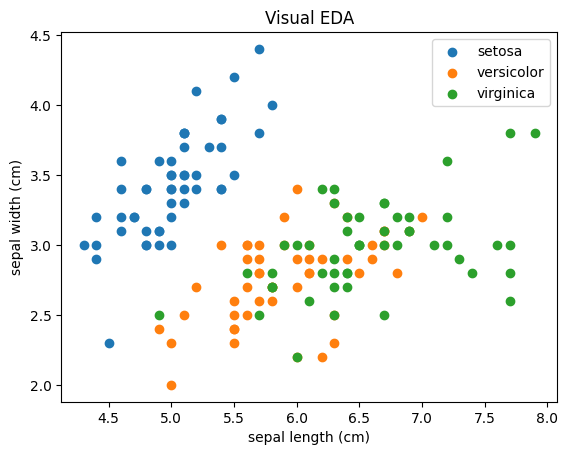

In [122]:
setosa = feature_data[target_data==0]
versicolor = feature_data[target_data==1]
virginica = feature_data[target_data==2]

plt.scatter(setosa[:,0], setosa[:,1], label="setosa")
plt.scatter(versicolor[:,0], versicolor[:,1], label="versicolor")
plt.scatter(virginica[:,0], virginica[:,1], label="virginica")

plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Visual EDA");

In the above step, we used boolean indexing to filter the feature data based on the target data class. This allowed us to create a scatter plot for each of the iris classes and distinguish them by color.

*Observations*: We can see that the "setosa" class typically consists of medium-to-high sepal width with low-to-medium sepal length, while the other two classes have lower width and higher length. The "virginica" class appears to have the largest combination of the two.

**YOUR TURN:**
* Which of the iris classes is linearly seperable based on sepal characteristics?
* Which of the iris classes is not?
* Can we (easily) visualize each of the samples w.r.t. all features on the same plot? Why/why not?

### Creating a Nearest Neighbors Classifier

Now that we've explored the data a little bit, we're going to use scikit-learn to create a nearest neighbors classifier for the data. Effectively we'll be developing a model whose job it is to build a relationship over input feature data (sepal and petal characteristics) that predicts the iris sample class (e.g. "setosa"). This is an example of a *supervised learning* task; we have all the features and all the target classes.

Model creation in scikit-learn follows a **data prep -> fit -> predict** process. The "fit" function is where the actual model is trained and parameter values are selected, while the "predict" function actually takes the trained model and applies it to the new samples.

First, we load the nearest neighbor library from scikit-learn:

In [123]:
from sklearn import neighbors

Now, we're going to save our feature data into an array called 'X' and our target data into an array called 'y'. We don't *need* to do this, but it is traditional to think of the problem using this notation.

In [124]:
X = feature_data
y = target_data

Next, we create our nearest neighbor classifier object:

In [125]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

And then we *fit* it to the data (i.e., train the classifier).

In [126]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

Now we have a model! If you're new to this, you've officially built your first machine learning model. If you use "knn.predict(*[[feature array here]]*)", you can use your trained model to predict the class of a new iris sample.

* What is the predicted class of a new iris sample with feature vector [3,4,5,2]? What is its name?
* Do you think this model is overfit or underfit to the iris dataset? Why?
* How many neighbors does our model consider when classifying a new sample?

In [127]:
knn.predict(np.array([[3,4,5,2]]))[0]

2

In [128]:
t = knn.predict(np.array([[3,4,5,2]]))[0]
print("New prediction is class %d, aka. %s" % (t, target_names[t]))

New prediction is class 2, aka. virginica


In [129]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [130]:
np.array([[3,4,5,2]])[0]

array([3, 4, 5, 2])

In [131]:
knn.predict(np.array([[3,4,5,2]]))

array([2])

In [132]:
np.array([3,4,5,2]).shape

(4,)

As you may have noted in the previous cell, we've trained this classifier on our *entire dataset*. This typically isn't done in practice and results in overfitting to the data. Here's a bit of a tricky question:

* If we use our classifier to predict the classes of the iris samples that were used to train the model itself, what will our overall accuracy be?

We can validate our hypothesis fairly easily using either: i) the NumPy technique for calculating accuracy we used earlier in the lab, or ii) scikit-learn's in-house "accuracy_score()" function.

Let's use our technique first:

In [133]:
accuracy = np.sum(target_data == knn.predict(feature_data)) / target_data.size
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  100.0 %


and then using scikit-learn's customized function:

In [134]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_data, knn.predict(feature_data))
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  100.0 %


We see that our classifier has achieved 100% accuracy (and both calculation methods agree)!

**DISCUSSION:**
* Why do you think the model was able to achieve such a "great" result?
* What does this really tell us?
* Do you expect the model to perform this well on new data?

### Cross Validation

A popular way to mitigate this overfitting issue is to train your model on *some* of the data (the training set) and validate your model on the remaining data (the validation set). You will then select the model/configuration that performs best on the validation data. The train/validate division of the data is usually done with a 70%/30% split. Often, practitioners will use a third data set, the test set (or hold-out set), to get a sense for how their best model performs on unseen, real-world data. In this scenario, you will tune your models to perform best on the validation set and then test their "real-world" performance on the unseen test set.

Sometimes applications don't have enough data to do these splits meaningfully (e.g., the test data is only a few samples). In these cases, *cross-validation* is a useful technique (and, indeed, has become standard in machine learning practice).

The general premise of "k-folds" cross validation is to first divide the entire dataset (grey) into a training set (green) and a test set (unseen data, blue). Then, we divide the training set into different folds and use these folds to form new sub-training and sub-test sets. We select the model configuration that performs the best on all of these. The below figure provides a nice visualization for what's going on here:

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="cross-val" width="500"/>


Accomplishing k-folds cross validation in scikit-learn is a manageable task. First, we divide our data into a train and test set, then we conduct the cross validation and look at the mean scores across the splits, then we conduct our final evaluation.

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)

We have divided our data into two sections: training data (70% of the data) and testing data (30% of the data). Now, we will fit our nearest neighbors classifier to the training data using 5-fold cross-validation and see how it performs.

We will be applying `cross_validate` in sklearn to perform cross-validation. We can get both train and validation accuracies using `cross_validate`. Please note that you should set **return_train_score=True** if you want `cross_validate` to return train scores in addition to test scores.

You can use the following link to learn more about `cross_validate`:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [136]:
from sklearn.model_selection import cross_validate
scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)

print('Mean Train Accuracy:',scores['train_score'].mean()) # returns the mean cross-validation train score
print('Mean Validation Accuracy:', scores['test_score'].mean()) # returns the mean cross-validation validation score

Mean Train Accuracy: 1.0
Mean Validation Accuracy: 0.9428571428571428


In [137]:
scores['train_score']

array([1., 1., 1., 1., 1.])

In [138]:
scores['test_score']

array([0.85714286, 1.        , 1.        , 0.9047619 , 0.95238095])

Our cross-validated model has an accuracy of 94% across all the splits on the training data. If we think that is a reasonable value, we can train our final model on the training data and then see how it performs on the held-out test data.

##### Comparing classifiers
However, to get a true sense for the utility of cross-validation, let's create a second nearest neighbors classifier that uses five neighbors instead of one.

In [139]:
knn_5 = neighbors.KNeighborsClassifier(n_neighbors=5)
scores = cross_validate(knn_5, X_train, y_train, cv=5, return_train_score=True)

print('Mean Train Accuracy:',scores['train_score'].mean()) # returns the mean cross-validation train score
print('Mean Validation Accuracy:', scores['test_score'].mean())

Mean Train Accuracy: 0.9666666666666666
Mean Validation Accuracy: 0.961904761904762



Let's train it on the training data and use it to predict the final held-out test data.

In [140]:
knn_5.fit(X_train, y_train)
accuracy = accuracy_score(y_test, knn_5.predict(X_test))
print ("Test set accuracy: ", accuracy * 100, "%")

Test set accuracy:  97.77777777777777 %


And we see our model has a 97.7% accuracy on the held out test data (30% of the original dataset).